In [3]:
testrun = 'run1'
testname = 'throughput1' #'latency1'
testStat = 'throughput_single.transactions' #'latency_5m_single_transactions.transactions'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
# We use larger plot areas, adjust to your needs.
plt.rcParams["figure.figsize"] = (20, 10)

filepath = 'data/hbbft/' + testrun + '/' + testname +  '/' + testStat + '.csv'

df2 = pd.read_csv('data/hbbft/compareThroughput/throughput_single.transactions.csv')
df2['timeSinceLastSend'] = df2.timeSend - df2.shift(1).timeSend

df3 = pd.read_csv('data/hbbft/compareThroughput/throughput_limit1000.csv')
df3['timeSinceLastSend'] = df3.timeSend - df3.shift(1).timeSend

df3['confirmedSinceStart'] = (df3.timeConfirmed - min(df3['timeConfirmed']))


# print(filepath);
#df = pd.read_csv(filepath, header=None)
df = pd.read_csv(filepath)

# print(df.timeSend)
df['before'] = df['timeSend'].shift(1)
df['timeSinceLastSend'] = df.timeSend - df.shift(1).timeSend

# df.head()
df3.head()




,internalTxID,transactionHash,blockNumber,timeSend,timeReceipt,timeConfirmed,timeSinceLastSend,confirmedSinceStart
0,2,0xffd1e4a3197901fcc8bcf0eb1363ace85354b447afec...,6771.0,1585776575214,1.585777e+12,1.585777e+12,NaN,7.0
1,4,0x3a6ebef52b1998d47f10d544e558cc5c1fd92cba9f2d...,6771.0,1585776575238,1.585777e+12,1.585777e+12,24.0,0.0
2,6,0xe3cf7f78be9f628bf6bb5d1c1d1129067a7aa1a2f9c4...,6772.0,1585776575262,1.585777e+12,1.585777e+12,24.0,1498.0
3,6,0x59b243949dd11d9362a0b6ecca0a78b0b1182eeea071...,6772.0,1585776575263,1.585777e+12,1.585777e+12,1.0,1525.0
4,7,0x80043fcc27be49843e9cb54d74c61472c0f8d96a5cc7...,6772.0,1585776575286,1.585777e+12,1.585777e+12,23.0,1499.0


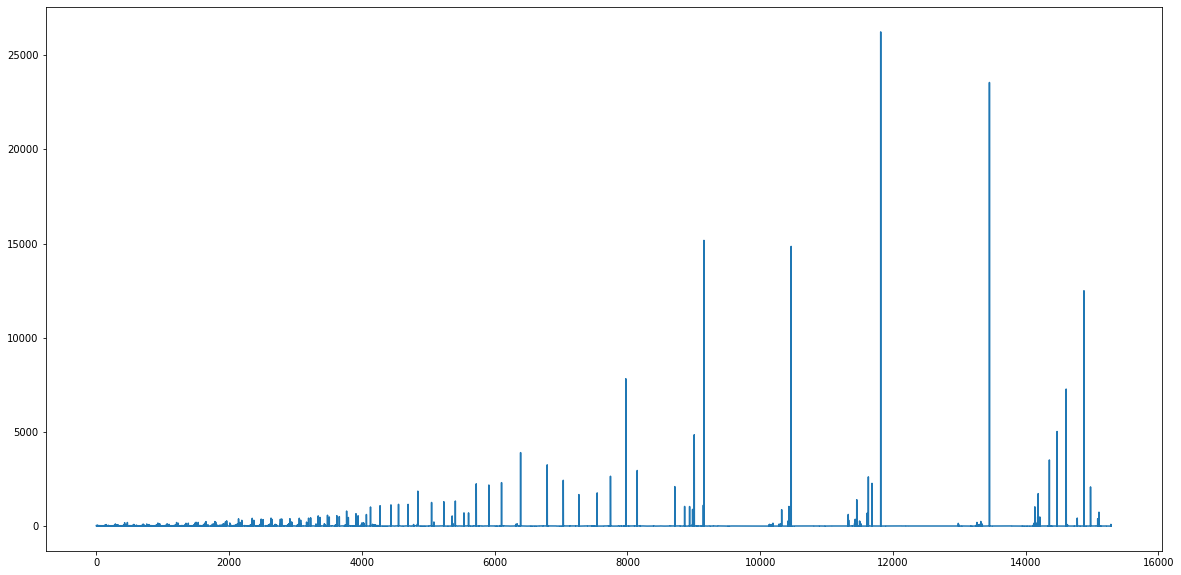

In [69]:
#plot = plt.plot(df.timeSinceLastSend)
#plot2 = plt.plot(df2.timeSinceLastSend)
plot3 = plt.plot(df3.timeSinceLastSend)

In [68]:
# grouped = df3.groupby(['blockNumber']).count()
grouped = df3.groupby(['blockNumber']).count()
grouped.head()

,internalTxID,transactionHash,timeSend,timeReceipt,timeConfirmed,timeSinceLastSend,confirmedSinceStart
blockNumber,,,,,,,
6771.0,2,2,2,2,2,1,2
6772.0,19,19,19,19,19,19,19
6773.0,103,103,103,103,103,103,103
6774.0,20,20,20,20,20,20,20
6775.0,120,120,120,120,120,120,120


In [71]:
# grouped = df3.groupby(['blockNumber']).count()
grouped = df3.groupby(['blockNumber']).agg({'internalTxID': 'count',
                                            'transactionHash': 'count',
                                            'timeSend': ['min', 'max'],
                                            'timeReceipt': ['min', 'max'],
                                            'timeConfirmed': ['min', 'max'],
                                            'timeSinceLastSend': ['min', 'max'],
                                            'confirmedSinceStart' : 'max'})
# grouped.timeConfirmed.min
# plot = plt.plot(grouped.transactionHash)
grouped['confirmedSinceBefore'] = grouped.confirmedSinceStart - grouped.shift(1).confirmedSinceStart


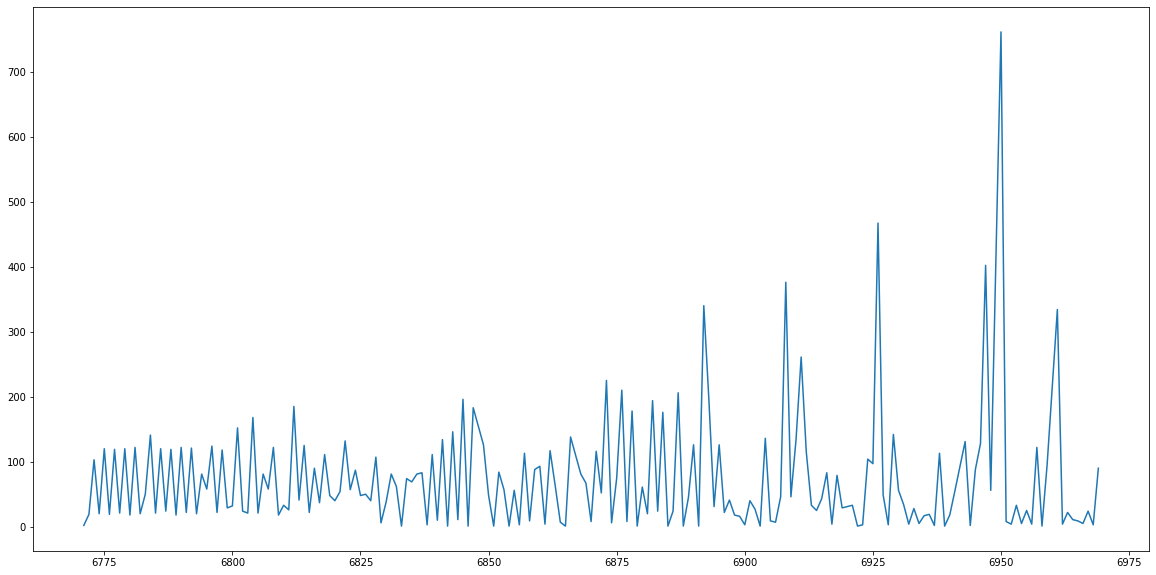

In [56]:
plotTxPerBlock = plt.plot(grouped.internalTxID)

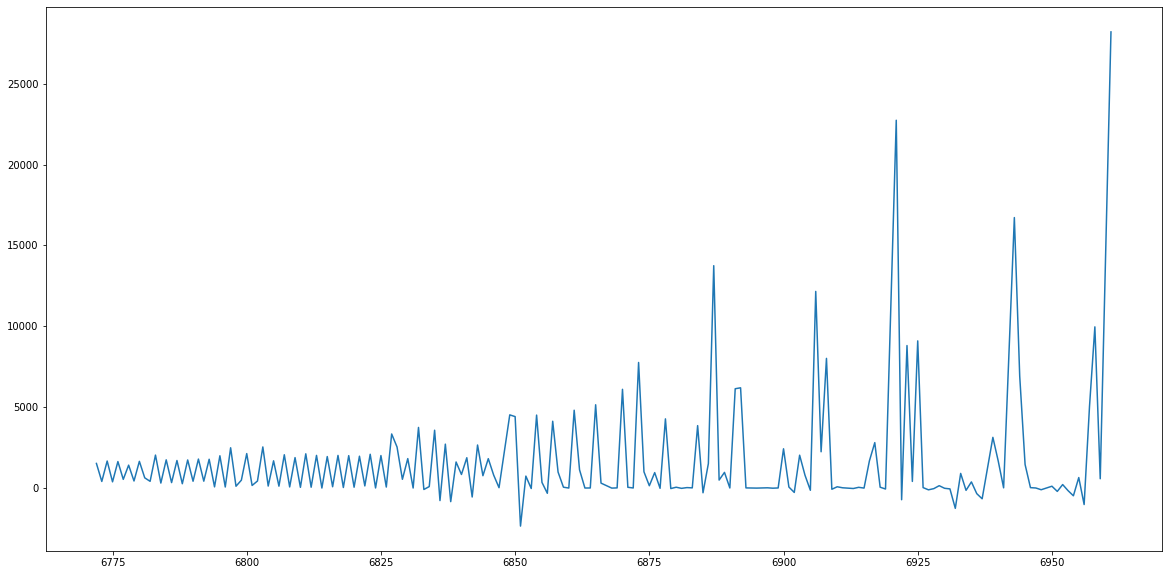

In [72]:
# grouped = df3.groupby(['blockNumber']).count()

# confirmedSinceStart

# df3
# max(df3['secondConfirmed']) - min(df3['secondConfirmed'])

plt.plot(grouped.confirmedSinceBefore)